## Kütüphanlerin Yüklenmesi

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

## Veri Setinin Yüklenmesi

In [73]:
# breast-cancer-wisconsin verisetini yükleyelim
dataset = load_dataset("scikit-learn/breast-cancer-wisconsin")
df = dataset["train"].to_pandas()

# Pandas ayarlarını yaparak tüm sütunların görünmesini sağlıyoruz
pd.set_option('display.max_columns', None)

# İlk 10 satıra bakalım
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Tahmin etmemiz gereken değerler "diagnosis" sütununda

In [74]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Object veri türünde olan "diagnosis" için sayısal değere dönüştürelim

In [76]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [77]:
df["diagnosis"] = df["diagnosis"].map({"M" : 0 , "B" : 1})

In [78]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [79]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

## Özellik ve hedef değişken

In [80]:
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df["diagnosis"]

### Özellik seçimi (k en iyi özellikleri seçme)

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif

In [82]:
selector = SelectKBest(score_func=f_classif, k=10)  # En iyi 10 özelliği seç
X_new = selector.fit_transform(X, y)

In [83]:
# Seçilen özelliklerin indekslerini al
selected_features = selector.get_support(indices=True)

# Seçilen özelliklerin isimlerini al
selected_feature_names = X.columns[selected_features]

In [84]:
print("Seçilen Özellikler:", selected_feature_names)

Seçilen Özellikler: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [85]:
# Skorlar (her özelliğin f-test skorları)
scores = selector.scores_
# P-değerleri (her özelliğin p-değerleri)
p_values = selector.pvalues_

In [86]:
# Skorları ve p-değerlerini gösterir
for feature, score, p_value in zip(X.columns, scores, p_values):
    print(f"Özellik: {feature}, Skor: {score}, P-değeri: {p_value}")

Özellik: radius_mean, Skor: 646.9810209786473, P-değeri: 8.465940572259247e-96
Özellik: texture_mean, Skor: 118.09605934497365, P-değeri: 4.058636047908563e-25
Özellik: perimeter_mean, Skor: 697.235272476532, P-değeri: 8.436251036161722e-101
Özellik: area_mean, Skor: 573.0607465682366, P-değeri: 4.734564310305572e-88
Özellik: smoothness_mean, Skor: 83.65112340843194, P-değeri: 1.051850359200222e-18
Özellik: compactness_mean, Skor: 313.23307856764205, P-değeri: 3.938263105887389e-56
Özellik: concavity_mean, Skor: 533.7931262035503, P-değeri: 9.96655575506809e-84
Özellik: concave points_mean, Skor: 861.6760200073135, P-değeri: 7.101150161049467e-116
Özellik: symmetry_mean, Skor: 69.52744350046207, P-değeri: 5.733384028468339e-16
Özellik: fractal_dimension_mean, Skor: 0.0934592948710943, P-değeri: 0.7599368037304223
Özellik: radius_se, Skor: 268.84032696734437, P-değeri: 9.738948656460723e-50
Özellik: texture_se, Skor: 0.03909470231209489, P-değeri: 0.8433320287684485
Özellik: perimeter_s

#### Hangi özellikleri nasıl seçtiğimiz anladığımıza göre  verimizi test - train diye bölelim

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

#### X yerine X_new almamızın nedeni özellik seçimi kısmına bakarak anlayabilirsiniz

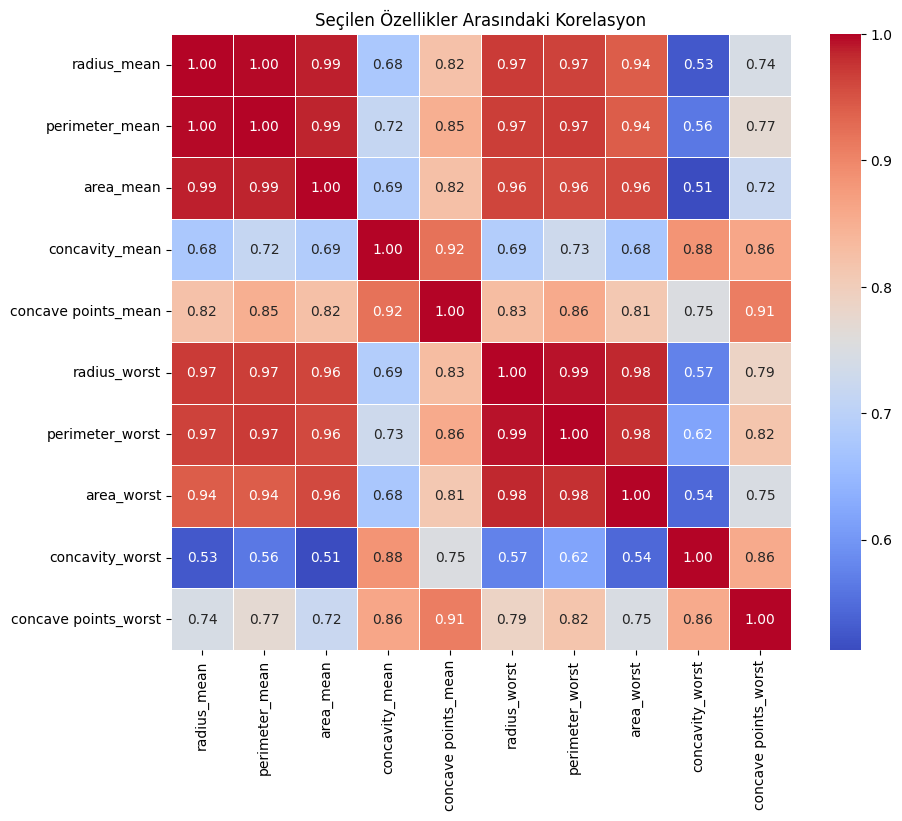

In [89]:
# Seçilen özellikleri pandas DataFrame'e dönüştür
X_new_df = pd.DataFrame(X_new, columns=selected_feature_names)

# Seçilen özelliklerin korelasyonunu hesaplayalım
selected_corr_matrix = X_new_df.corr()

# Korelasyon ısı haritasını çiziyoruz
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Seçilen Özellikler Arasındaki Korelasyon')
plt.show()

In [90]:
selected_corr_matrix

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
radius_mean,1.000000,0.997855,0.987357,0.676764,0.822529,0.969539,0.965137,0.941082,0.526911,0.744214
perimeter_mean,0.997855,1.000000,0.986507,0.716136,0.850977,0.969476,0.970387,0.941550,0.563879,0.771241
area_mean,0.987357,0.986507,1.000000,0.685983,0.823269,0.962746,0.959120,0.959213,0.512606,0.722017
concavity_mean,0.676764,0.716136,0.685983,1.000000,0.921391,0.688236,0.729565,0.675987,0.884103,0.861323
concave points_mean,0.822529,0.850977,0.823269,0.921391,1.000000,0.830318,0.855923,0.809630,0.752399,0.910155
radius_worst,0.969539,0.969476,0.962746,0.688236,0.830318,1.000000,0.993708,0.984015,0.573975,0.787424
perimeter_worst,0.965137,0.970387,0.959120,0.729565,0.855923,0.993708,1.000000,0.977578,0.618344,0.816322
area_worst,0.941082,0.941550,0.959213,0.675987,0.809630,0.984015,0.977578,1.000000,0.543331,0.747419
concavity_worst,0.526911,0.563879,0.512606,0.884103,0.752399,0.573975,0.618344,0.543331,1.000000,0.855434
concave points_worst,0.744214,0.771241,0.722017,0.861323,0.910155,0.787424,0.816322,0.747419,0.855434,1.000000


## Özellikleri ölçeklendirelim (özellikle Lojistik Regresyon ve KNN için)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
len(X_train)

398

In [94]:
len(X_test)

171

In [95]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve , auc

## Logistic Regression Modeli

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
log_reg = LogisticRegression(random_state = 42 , max_iter = 10000)
log_reg.fit(X_train_scaled, y_train)
log_pred = log_reg.predict(X_test_scaled)

### Sonuçları değerlendir

In [98]:
log_pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [99]:
y_test[:10]

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
Name: diagnosis, dtype: int64

In [100]:
accuracy_log = accuracy_score(y_test, log_pred)
accuracy_log

0.9649122807017544

In [101]:
cm_log = confusion_matrix(y_test, log_pred)
cm_log

array([[ 61,   2],
       [  4, 104]], dtype=int64)

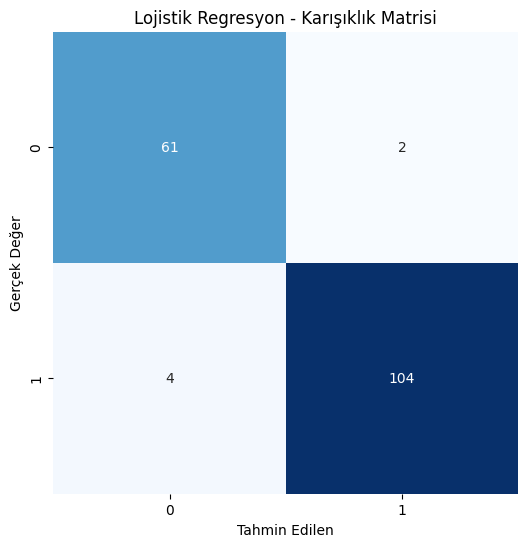

In [102]:
# Karışıklık Matrisi Görselleştirmesi (Lojistik Regresyon)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Lojistik Regresyon - Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

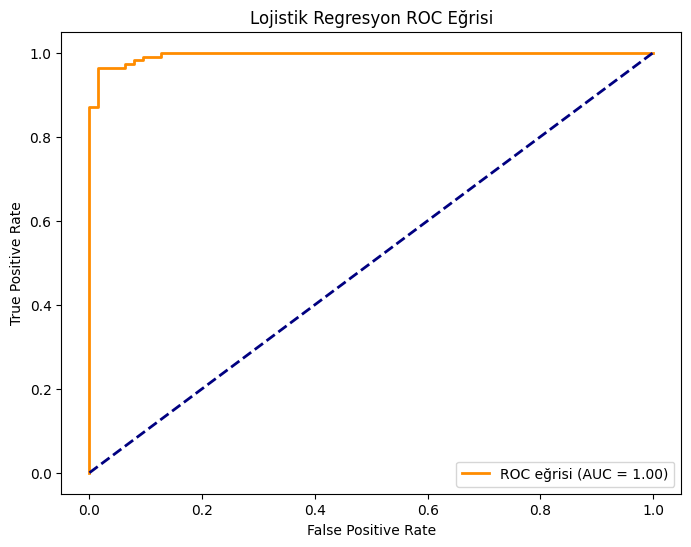

In [103]:
# ROC Eğrisi (Lojistik Regresyon)
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lojistik Regresyon ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [104]:
roc_auc

0.9951499118165785

In [105]:
report_log = classification_report(y_test, log_pred)
print(report_log)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## Decision Tree Modeli

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
treeclf = DecisionTreeClassifier(random_state = 42)
treeclf.fit(X_train , y_train)
tree_pred = treeclf.predict(X_test)

### Sonuçları değerlendir

In [108]:
tree_pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [109]:
y_test[:10]

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
Name: diagnosis, dtype: int64

In [110]:
accuracy_tree = accuracy_score(y_test, tree_pred)
accuracy_tree

0.9415204678362573

In [111]:
cm_tree = confusion_matrix(y_test, tree_pred)
cm_tree

array([[ 58,   5],
       [  5, 103]], dtype=int64)

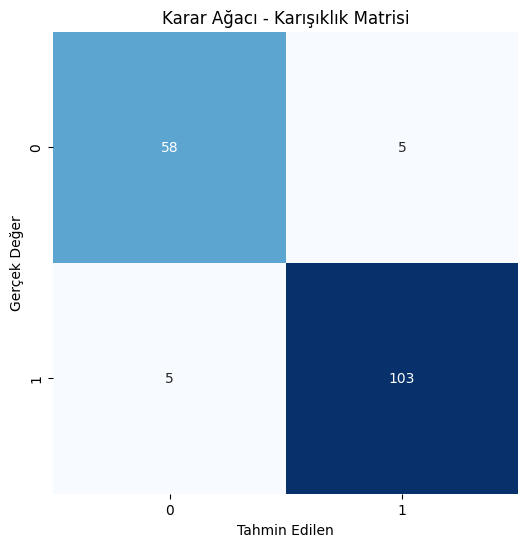

In [112]:
# Karışıklık Matrisi Görselleştirmesi (Karar Ağacı)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karar Ağacı - Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

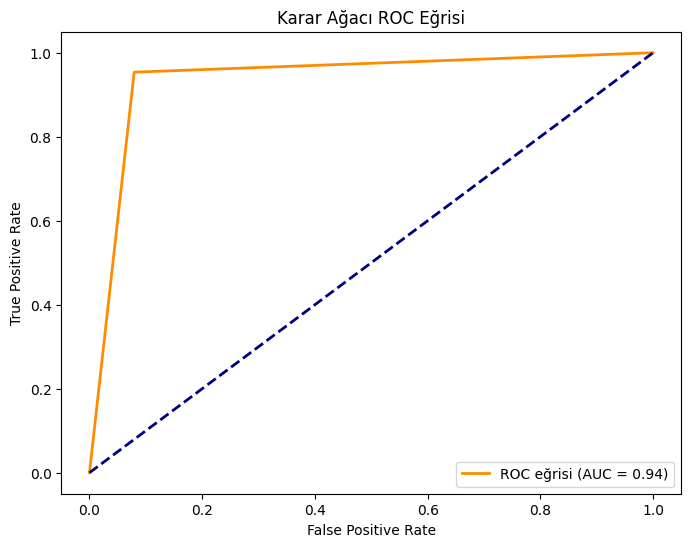

In [113]:
# ROC Eğrisi (Karar Ağacı)
fpr, tpr, thresholds = roc_curve(y_test, treeclf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Karar Ağacı ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [114]:
roc_auc

0.9371693121693122

In [115]:
report_tree = classification_report(y_test, tree_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        63
           1       0.95      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## Random Forest Modeli

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
forestclf = RandomForestClassifier(random_state = 0 , 
                                   n_estimators = 100 , # Ağaç sayısı
                                   max_depth = 10)  # Maksimum derinlik
forestclf.fit(X_train , y_train)
forestclf_pred = forestclf.predict(X_test)

### Sonuçları değerlendir

In [137]:
forestclf_pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [138]:
y_test[:10]

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
Name: diagnosis, dtype: int64

In [139]:
accuracy_forest = accuracy_score(y_test, forestclf_pred)
accuracy_forest

0.9590643274853801

In [140]:
cm_forest = confusion_matrix(y_test, forestclf_pred)
cm_forest

array([[ 59,   4],
       [  3, 105]], dtype=int64)

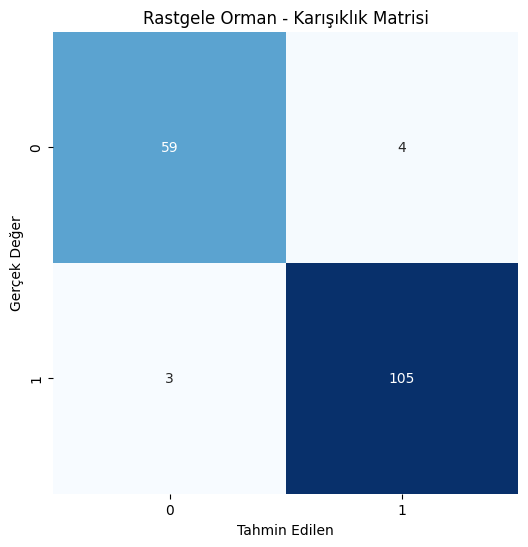

In [141]:
# Karışıklık Matrisi Görselleştirmesi (Rastgele Orman)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, forestclf_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Rastgele Orman - Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()


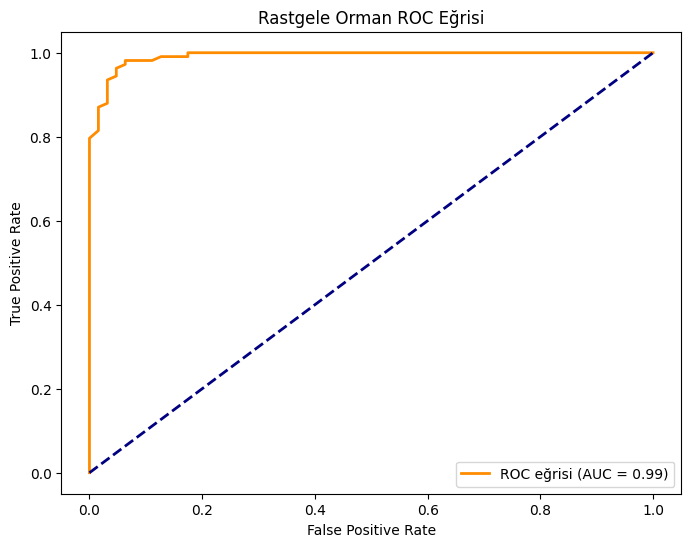

In [142]:
# ROC Eğrisi (Rastgele Orman)
fpr, tpr, thresholds = roc_curve(y_test, forestclf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rastgele Orman ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()


In [143]:
roc_auc

0.9919165196942975

In [144]:
report_forest = classification_report(y_test, forestclf_pred)
print(report_forest)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## KNeighbors Classifier Modeli

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
# K-En Yakın Komşu Modeli
kneighclf = KNeighborsClassifier(n_neighbors=3)
kneighclf.fit(X_train_scaled, y_train)
kneighclf_pred = kneighclf.predict(X_test_scaled)

### Sonuçları değerlendir

In [156]:
kneighclf_pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [157]:
y_test[:10]

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
Name: diagnosis, dtype: int64

In [158]:
accuracy_kneigh = accuracy_score(y_test, kneighclf_pred)
accuracy_kneigh

0.9532163742690059

In [159]:
cm_kneigh = confusion_matrix(y_test, kneighclf_pred)
cm_kneigh

array([[ 59,   4],
       [  4, 104]], dtype=int64)

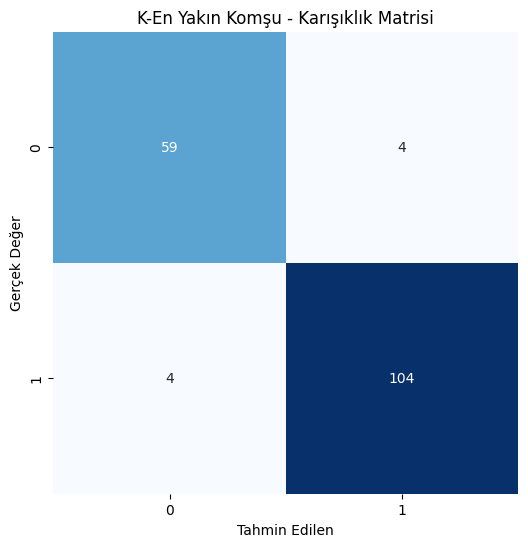

In [160]:
# Karışıklık Matrisi Görselleştirmesi (K-En Yakın Komşu)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, kneighclf_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-En Yakın Komşu - Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

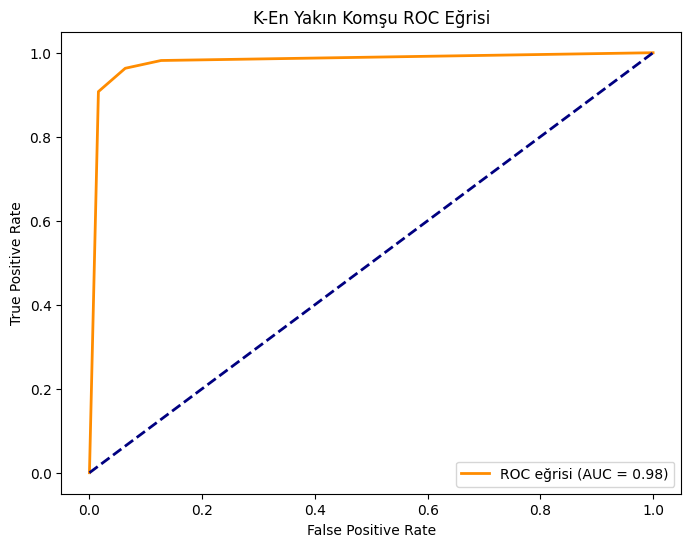

In [161]:
# ROC Eğrisi (K-En Yakın Komşu)
fpr, tpr, thresholds = roc_curve(y_test, kneighclf.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-En Yakın Komşu ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [162]:
roc_auc

0.978395061728395

In [163]:
report_kneigh = classification_report(y_test, kneighclf_pred)
print(report_kneigh)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### Modellerin doğruluk değerlerinin birbirleriyle karşılaştırılması

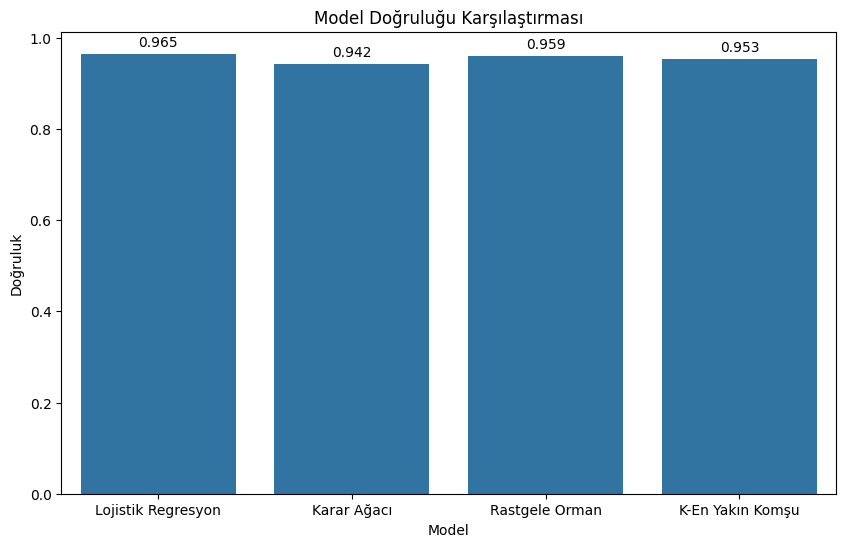

In [164]:
# Model isimleri ve doğruluk değerleri
models = ['Lojistik Regresyon', 'Karar Ağacı', 'Rastgele Orman', 'K-En Yakın Komşu']
accuracies = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, tree_pred),
    accuracy_score(y_test, forestclf_pred),
    accuracy_score(y_test, kneighclf_pred)
]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
graf = sns.barplot(x=models, y=accuracies)

# Her çubuğun üzerine doğruluk değerini yazdırmak için
for i, value in enumerate(accuracies):
    graf.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Model Doğruluğu Karşılaştırması')
plt.xlabel('Model')
plt.ylabel('Doğruluk')
plt.show()
